# Replicating BOM Color Table from Sample Image.

## Libraries

In [1]:
#### Library

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
#import colormap          as cm
import matplotlib        as mpl
import xarray            as xr
import matplotlib        as mpl
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import metpy             as metpy

colorbar_pad    = 0.012
colorbar_shrink = 0.8
figure_domain_size = [15,8]
cart_proj = ccrs.PlateCarree()

Mines_Blue = "#002554"


plt.rcParams.update({'text.color'      : Mines_Blue,
                     'axes.labelcolor' : Mines_Blue,
					 'axes.edgecolor'  : Mines_Blue,
					 'xtick.color'     : Mines_Blue,
					 'ytick.color'     : Mines_Blue})


# Desired Image

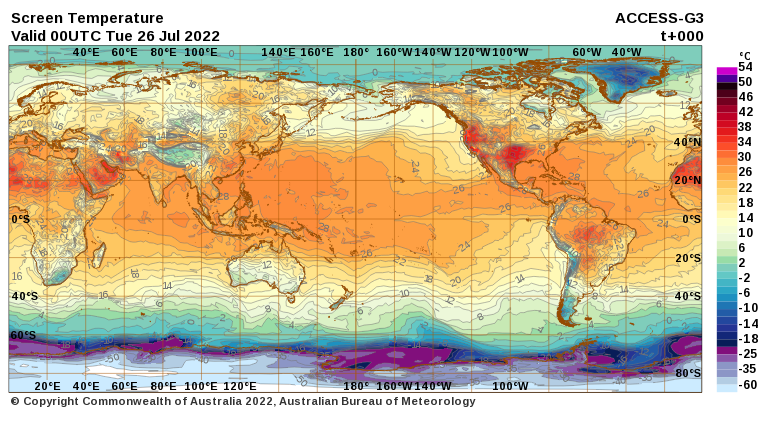


In [2]:
###################################################
#
# BOM Temperature Color Table.
#


bom_temp_colors  = ['#ccebff', 
					'#b3cde3',
					'#a0b2d4', 
					'#8c96c6', 
					'#8856a7', 
					'#810f7c', 
					'#081d58', 
					'#132778', 
					'#253494', 
					'#23479e', 
					'#225ca7', 
					'#1f76b4', 
					'#1d91c0', 
					'#2ca7c5', 
					'#43b5c5', 
					'#63c8c5', 
					'#7fcdbb', 
					'#98dca6', 
					'#c7e9b4',
					'#dcf2c6', 
					'#edf8d9', 
					'#f5fcd3', 
					'#fcffcc', 
					'#fff9b6', 
					'#ffeda0', 
					'#ffe48b', 
					'#fed976', 
					'#fec761', 
					'#feb24c', 
					'#fea044', 
					'#fd8d3c', 
					'#fd6e33', 
					'#fc4e2a', 
					'#f23120', 
					'#e31a1c', 
					'#d20b20', 
					'#bd0026', 
					'#9f0027', 
					'#73001f', 
					'#4c0019', 
					'#19000d', 
					'#4c0099', 
					'#cc17cc',
				    '#ffffff']


bom_temp_colorsx = ['#ccebff', 
					'#b3cde3',
					'#a0b2d4', 
					'#8c96c6', 
					'#8856a7', 
					'#810f7c', 
					'#081d58', 
					'#132778', 
					'#253494', 
					'#23479e', 
					'#225ca7', 
					'#1f76b4', 
					'#1d91c0', 
					'#2ca7c5', 
					'#43b5c5', 
					'#63c8c5', 
					'#7fcdbb', 
					'#98dca6', 
					'#c7e9b4',
					'#dcf2c6', 
					'#edf8d9', 
					'#f5fcd3', 
					'#fcffcc', 
					'#fff9b6', 
					'#ffeda0', 
					'#ffe48b', 
					'#fed976', 
					'#fec761', 
					'#feb24c', 
					'#fea044', 
					'#fd8d3c', 
					'#fd6e33', 
					'#fc4e2a', 
					'#f23120', 
					'#e31a1c', 
					'#d20b20', 
					'#bd0026', 
					'#9f0027', 
					'#73001f', 
					'#4c0019', 
					'#19000d', 
					'#4c0099', 
					'#cc17cc']

temperature_colormap = mpl.colors.ListedColormap(colors = bom_temp_colorsx)
bom_colormap = mpl.colors.ListedColormap(colors = bom_temp_colors)

print(len(bom_temp_colorsx))
temp_range_degF =  np.linspace(-15, 120, 44) #


43


In [3]:
file = "http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/GFS/2013/08/07/gfs004_2013-08-07_12_F000.wrf_and_ci.grib2"

ds = xr.open_dataset(filename_or_obj=file)

ds = ds.metpy.parse_cf()

data_2d = ds["Temperature_surface"][0,:,:]
lon1d = ds["lon"]
lat1d = ds["lat"]


data_2d = (data_2d-273)*9/5 + 32
display(data_2d)

data_2d.attrs["units"] = "degF"
data_2d.attrs["long_name"] = "Ground Surface Temperature"

print(np.nanmax(data_2d))
print(np.nanmin(data_2d))

<xarray.DataArray 'Temperature_surface' (lat: 361, lon: 720)> Size: 1MB
array([[ 27.680012,  27.680012,  27.680012, ...,  27.680012,  27.680012,
         27.680012],
       [ 27.139978,  27.139978,  27.139978, ...,  27.139978,  27.139978,
         27.139978],
       [ 27.139978,  27.139978,  27.139978, ...,  27.139978,  27.139978,
         27.139978],
       ...,
       [-57.280014, -57.280014, -57.280014, ..., -57.46    , -57.46    ,
        -57.280014],
       [-58.      , -58.      , -58.      , ..., -58.      , -58.      ,
        -58.      ],
       [-58.719986, -58.719986, -58.719986, ..., -58.719986, -58.719986,
        -58.719986]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 8B 2013-08-07T12:00:00
  * lat        (lat) float32 1kB 90.0 89.5 89.0 88.5 ... -88.5 -89.0 -89.5 -90.0
  * lon        (lon) float32 3kB 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
    time       datetime64[ns] 8B 2013-08-07T12:00:00
    metpy_crs  object 8B Projection: latitude_longitude

145.22
-89.14


plt.colorbar(filled_cm, 
                 label  = r"2-m Temperature (°F)",
                 shrink = 1, 
                 extend = 'both',
                 pad    = 0.012,
                 ticks  = temp_range_degF[::-1],
                 values = temp_range_degF,
                 format = '%+d')


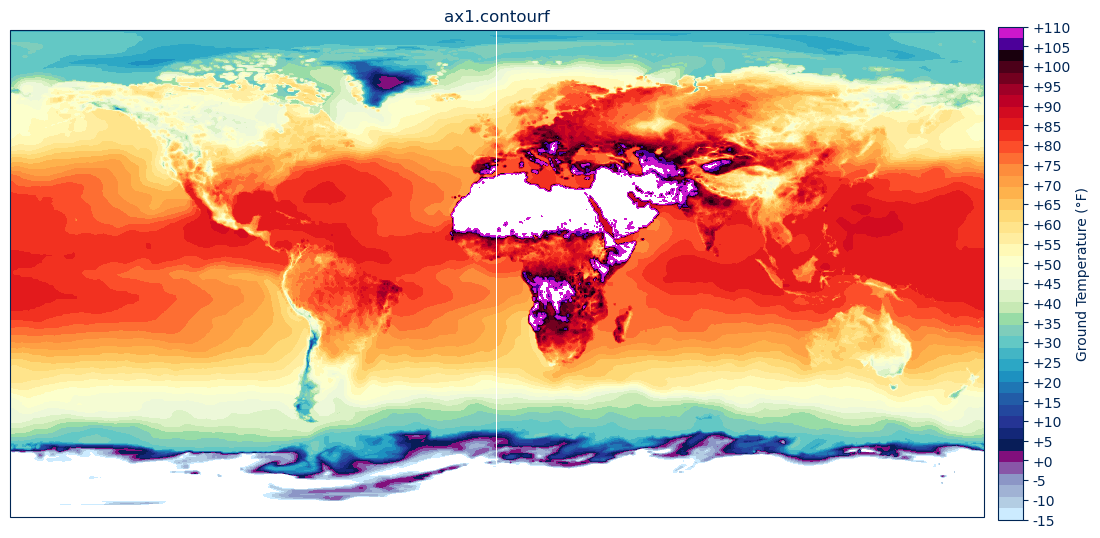

In [4]:
fig = plt.figure(figsize=[15,8])
ax1 = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree()) 

temp_range_degF =  np.linspace(-15, 110, 44)

ax1.set_title("ax1.contourf")

filled_cm = ax1.contourf(lon1d,lat1d,data_2d,
						 cmap     = temperature_colormap,
						 levels   =  temp_range_degF)

plt.colorbar(filled_cm, 
			 label  = r"Ground Temperature (°F)",
			 shrink = colorbar_shrink, 
			 extend = 'both',
			 pad    = colorbar_pad,
			 ticks  = np.arange(-15,111,5),
			 values = temp_range_degF,
			 format = '%+d')

plt.show()

3.2926829268292686


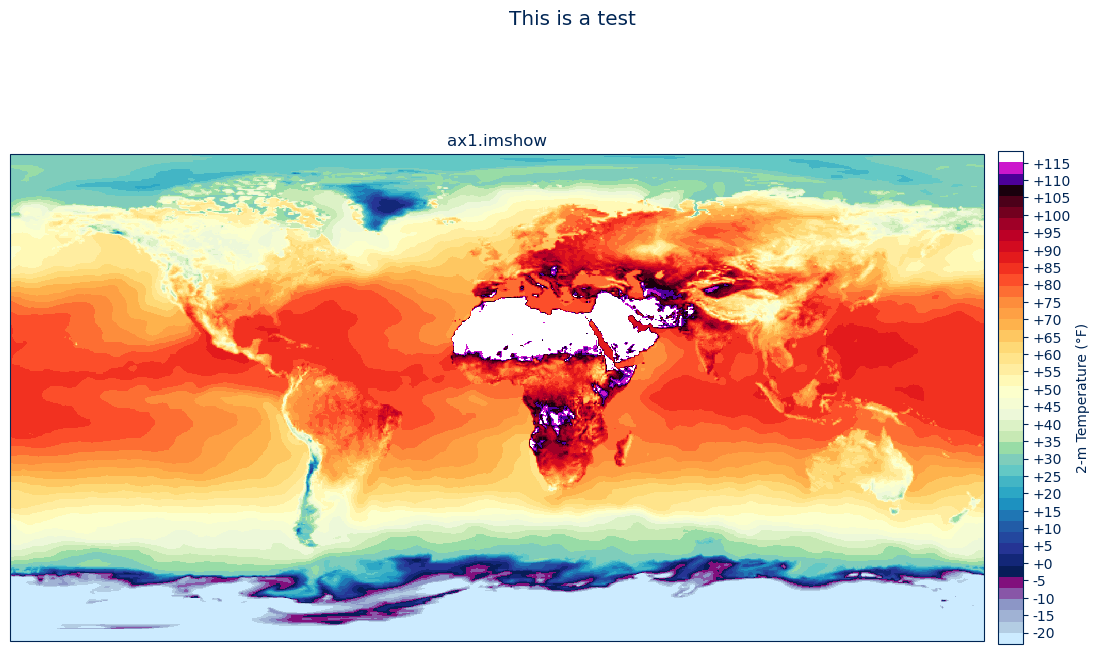

In [5]:
fig = plt.figure(figsize=[15,8])
ax1 = fig.add_subplot(1,1,1,projection = cart_proj) 

fig.suptitle("This is a test", fontsize="x-large")

temp_range_degF =  np.linspace(-20, 115, 44-2)
delta_t_scale   =  temp_range_degF[1]-temp_range_degF[0]
temp_range_degF =  np.linspace(-20-delta_t_scale, 115+delta_t_scale, 44)

bom_colorbar_ticks = np.arange(-20,116,5)

dewpoint_levels_degF = np.linspace(30,70,41) # in DegF


print(delta_t_scale)
temp_range_degF = temp_range_degF #- delta_t_scale

filled_cm = data_2d.plot.imshow(cmap          = bom_colormap,
								interpolation = "bilinear",
								vmin          = temp_range_degF.min(),
								vmax          = temp_range_degF.max(),
								add_colorbar  = False)

ax1.set_title("ax1.imshow")

plt.colorbar(filled_cm, 
			 label  = r"2-m Temperature (°F)",
			 shrink = colorbar_shrink, 
			 pad    = colorbar_pad,
			 ticks  = bom_colorbar_ticks,
			 format = '%+d')

plt.show()

In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans' not found.
findfont: Font family 'OpenSans'

/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-Bold.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-Regular.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-MediumItalic.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-BoldItalic.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-ExtraBoldItalic.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-Italic.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-ExtraBold.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-SemiBold.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-LightItalic.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-Medium.ttf
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/Open_Sans/static/OpenSans/OpenSans-SemiBoldItalic.ttf
/Users/wjc/GitHub/

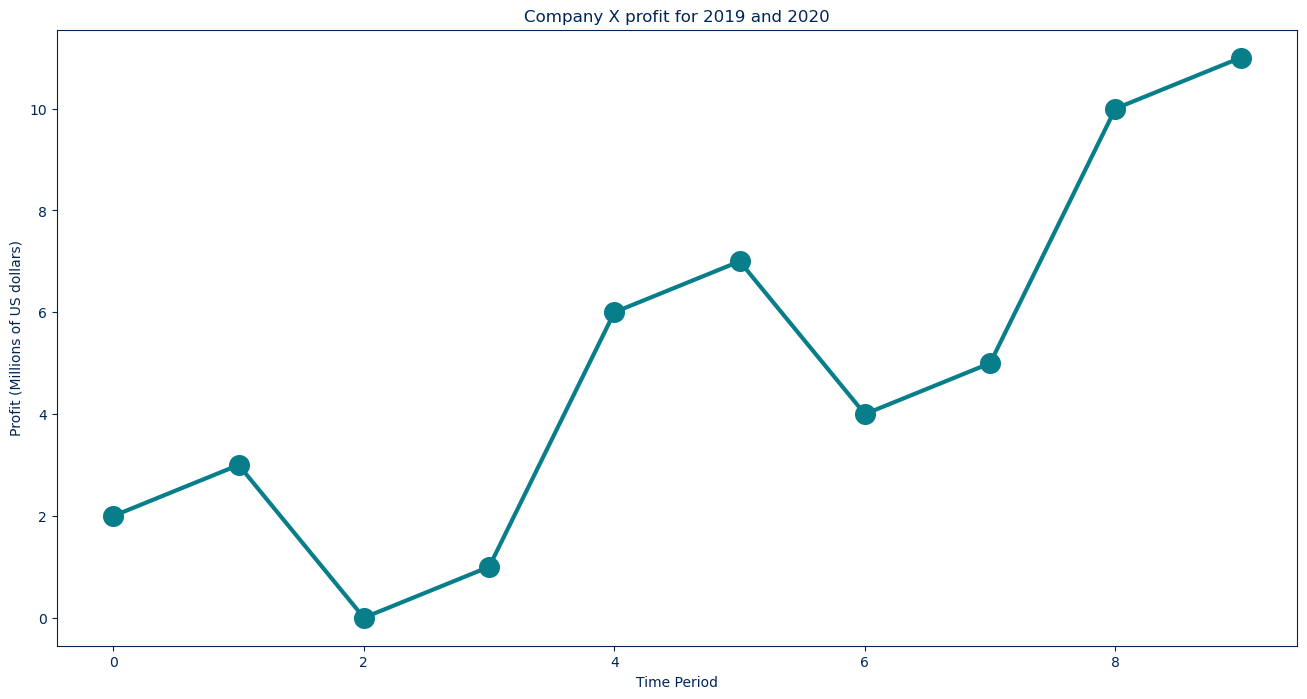

In [7]:



import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ["./Open_Sans/static/OpenSans/"]
for font in font_manager.findSystemFonts(font_dir):
	print(font)
	font_manager.fontManager.addfont(font)
	

# Set font family globally
plt.rcParams['font.family'] = 'OpenSans'

plt.figure(figsize=(16, 8))
plt.plot(np.arange(0,10), np.arange(0,10)^2, c='#087E8B', lw=3)
plt.scatter(np.arange(0,10), np.arange(0,10)^2, c='#087E8B', s=200)
plt.title('Company X profit for 2019 and 2020')
plt.xlabel('Time Period')
plt.ylabel('Profit (Millions of US dollars)')
plt.show()